In [1]:
# Cosine Learning Rate Decay (model_A+c)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay

# Load data
train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

# Set image size (batch=64, epochs=10)
img_width, img_height = 224, 224
batch_size = 64
total_epochs = 10

# Set data generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

# Load train & validation data to generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Import ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Configure model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Set cosine learning rate decay (rate=0.001)
lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=total_epochs*train_generator.samples//batch_size)

# Apply cosine learning rate decay to Adam optimizer
optimizer = Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate model
val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

# Print accuracy
print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

# Learning log output
print(history.history)


Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.


Epoch 1/10


114/114 [==============================] - 269s 2s/step - loss: 2.2509 - accuracy: 0.5058 - top_k_categorical_accuracy: 0.6886 - val_loss: 103.7087 - val_accuracy: 0.0854 - val_top_k_categorical_accuracy: 0.2522
Epoch 2/10
114/114 [==============================] - 264s 2s/step - loss: 0.9712 - accuracy: 0.7380 - top_k_categorical_accuracy: 0.9105 - val_loss: 5.3973 - val_accuracy: 0.0547 - val_top_k_categorical_accuracy: 0.0965
Epoch 3/10
114/114 [==============================] - 260s 2s/step - loss: 0.6763 - accuracy: 0.8140 - top_k_categorical_accuracy: 0.9549 - val_loss: 7.7474 - val_accuracy: 0.0547 - val_top_k_categorical_accuracy: 0.0926
Epoch 4/10
114/114 [==============================] - 260s 2s/step - loss: 0.6001 - accuracy: 0.8318 - top_k_categorical_accuracy: 0.9626 - val_loss: 7.8145 - val_accuracy: 0.0898 - val_top_k_categorical_accuracy: 0.1970
Epoch 5/10
114/114 [=

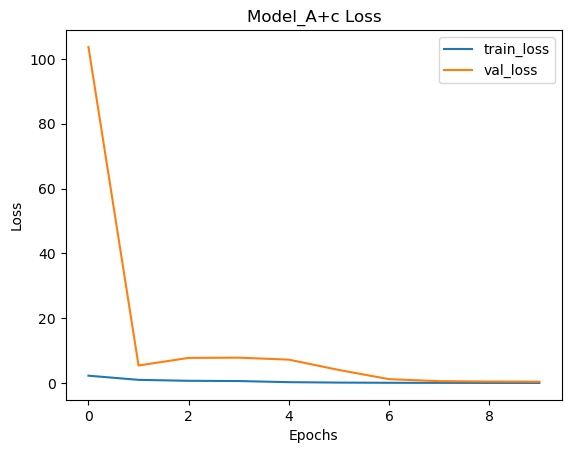

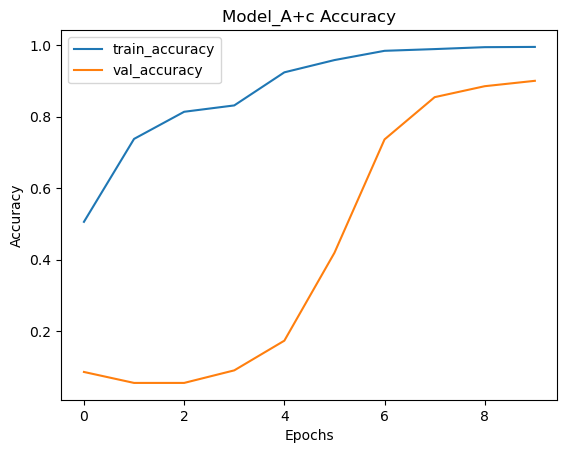

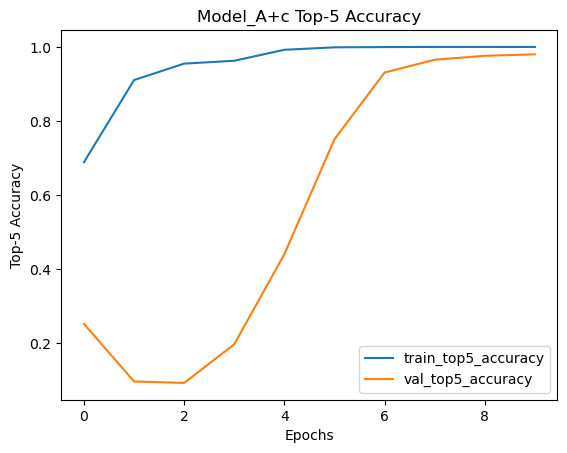

In [2]:
# Visualization Model_A+c learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+c Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+c Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+c Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [3]:
# Label Smoothing (model_A+l)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Apply label smoothing to Loss functions (label smoothing=0.1)
loss = CategoricalCrossentropy(label_smoothing=0.1)

model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 266s 2s/step - loss: 2.5148 - accuracy: 0.5375 - top_k_categorical_accuracy: 0.7246 - val_loss: 5.2785 - val_accuracy: 0.0056 - val_top_k_categorical_accuracy: 0.0664
Epoch 2/10
114/114 [==============================] - 260s 2s/step - loss: 1.6089 - accuracy: 0.7683 - top_k_categorical_accuracy: 0.9236 - val_loss: 5.0008 - val_accuracy: 0.0519 - val_top_k_categorical_accuracy: 0.0781
Epoch 3/10
114/114 [==============================] - 260s 2s/step - loss: 1.3128 - accuracy: 0.8571 - top_k_categorical_accuracy: 0.9734 - val_loss: 5.7290 - val_accuracy: 0.0536 - val_top_k_categorical_accuracy: 0.0865
Epoch 4/10
114/114 [==============================] - 259s 2s/step - loss: 1.1701 - accuracy: 0.9032 - top_k_categorical_accuracy: 0.9861 - val_loss: 6.1551 - val_accuracy: 0.0658 - val_top_k_categorical_accuracy: 0.1222
Epoch 5/10
114/114 [========

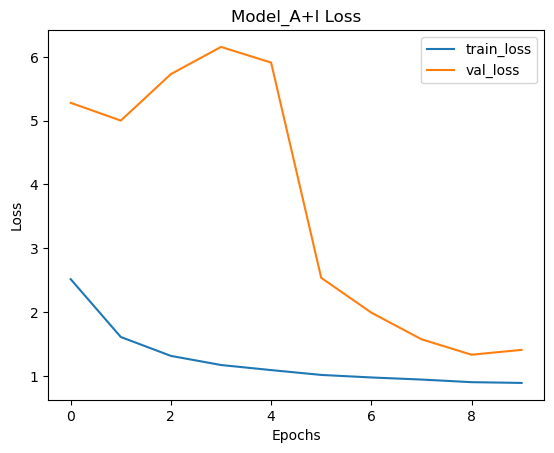

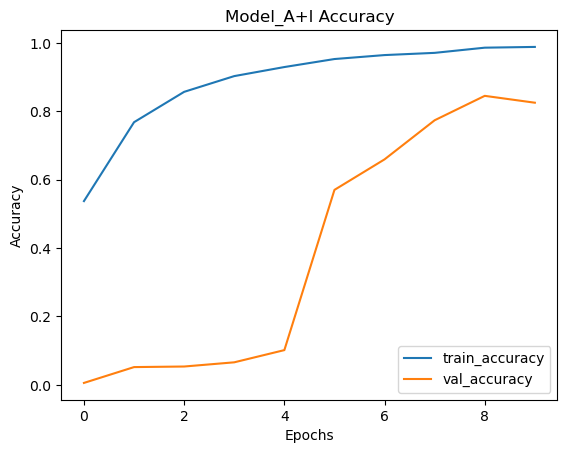

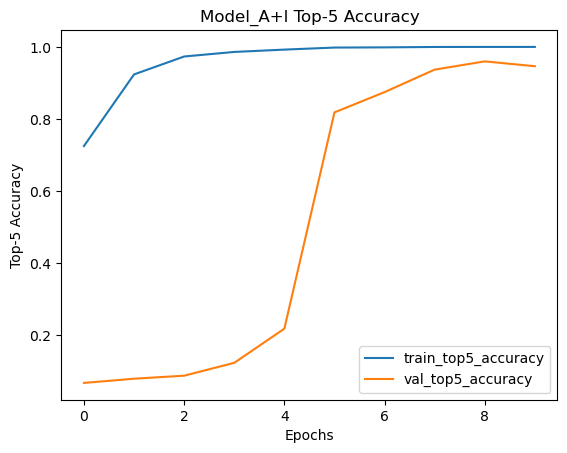

In [4]:
# Visualization Model_A+l learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+l Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+l Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+l Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [5]:
# Mixup Train (model_A+m)

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Mixup data generation function
def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lambda_val = np.random.beta(alpha, alpha)
    else:
        lambda_val = 1

    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    mixed_x = lambda_val * x + (1 - lambda_val) * x[index]
    mixed_y = lambda_val * y + (1 - lambda_val) * y[index]

    return mixed_x, mixed_y

# Mixup data generator
def mixup_generator(generator, alpha=0.2):
    while True:
        x_batch, y_batch = next(generator)
        x_batch, y_batch = mixup_data(x_batch, y_batch, alpha=alpha)
        yield x_batch, y_batch

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

# Use mixup data generator
train_mixup_generator = mixup_generator(train_generator)

history = model.fit(
    train_mixup_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 267s 2s/step - loss: 2.7209 - accuracy: 0.4649 - top_k_categorical_accuracy: 0.6393 - val_loss: 4.9200 - val_accuracy: 0.0100 - val_top_k_categorical_accuracy: 0.1317
Epoch 2/10
114/114 [==============================] - 260s 2s/step - loss: 1.7092 - accuracy: 0.6612 - top_k_categorical_accuracy: 0.8516 - val_loss: 4.8989 - val_accuracy: 0.0056 - val_top_k_categorical_accuracy: 0.0904
Epoch 3/10
114/114 [==============================] - 259s 2s/step - loss: 1.2149 - accuracy: 0.7721 - top_k_categorical_accuracy: 0.9306 - val_loss: 5.6417 - val_accuracy: 0.0564 - val_top_k_categorical_accuracy: 0.1228
Epoch 4/10
114/114 [==============================] - 260s 2s/step - loss: 1.1496 - accuracy: 0.8081 - top_k_categorical_accuracy: 0.9414 - val_loss: 4.0879 - val_accuracy: 0.2048 - val_top_k_categorical_accuracy: 0.4040
Epoch 5/10
114/114 [========

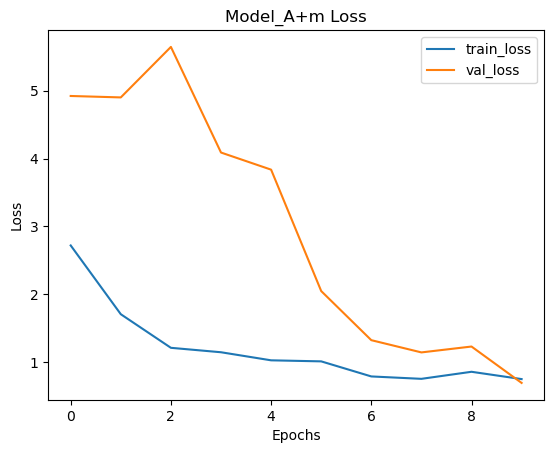

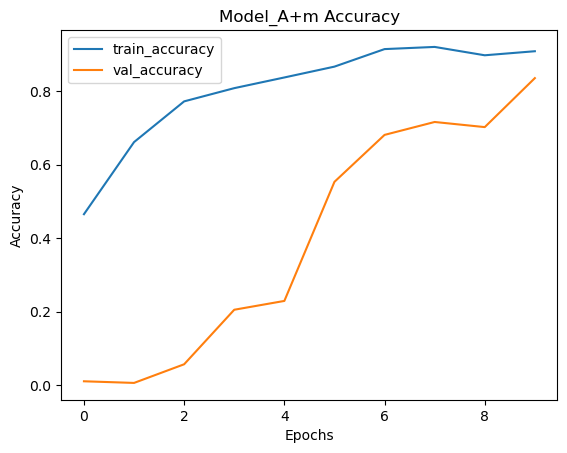

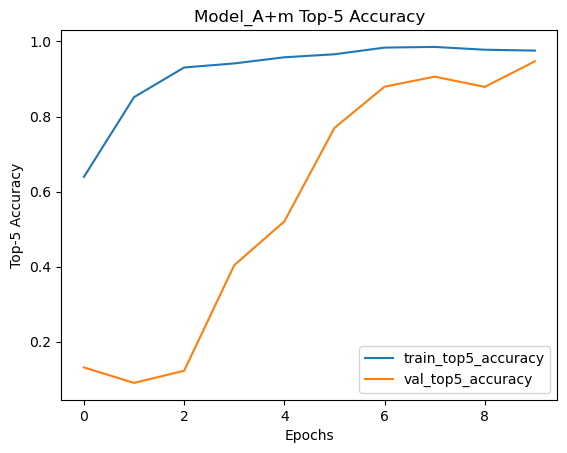

In [6]:
# Visualization Model_A+m learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+m Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+m Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+m Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [1]:
# Cosine Decay + Label Smoothing (model_A+c+l)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.losses import CategoricalCrossentropy

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64
total_epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Cosine learning rate decay
lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=total_epochs*train_generator.samples//batch_size)

# Apply to Adam optimizer
optimizer = Adam(learning_rate=lr_schedule)

# Label smoothing value
label_smoothing = 0.1

# Label smoothing to the Categorical Crossentropy loss function
loss_function = CategoricalCrossentropy(label_smoothing=label_smoothing)

# Compile model (Apply label Smoothing)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

c:\Users\co279\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\co279\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Found 7316 images belonging to 102 classes.
Found 1829 images belonging to 102 classes.


Epoch 1/10


114/114 [==============================] - 2020s 17s/step - loss: 2.4613 - accuracy: 0.5571 - top_k_categorical_accuracy: 0.7445 - val_loss: 116.1508 - val_accuracy: 0.0234 - val_top_k_categorical_accuracy: 0.0536
Epoch 2/10
114/114 [==============================] - 2051s 18s/step - loss: 1.5454 - accuracy: 0.7830 - top_k_categorical_accuracy: 0.9403 - val_loss: 5.7003 - val_accuracy: 0.0552 - val_top_k_categorical_accuracy: 0.1004
Epoch 3/10
114/114 [==============================] - 2013s 18s/step - loss: 1.2373 - accuracy: 0.8804 - top_k_categorical_accuracy: 0.9800 - val_loss: 4.8187 - val_accuracy: 0.0681 - val_top_k_categorical_accuracy: 0.1205
Epoch 4/10
114/114 [==============================] - 2017s 18s/step - loss: 1.0698 - accuracy: 0.9378 - top_k_categorical_accuracy: 0.9939 - val_loss: 4.8977 - val_accuracy: 0.1339 - val_top_k_categorical_accuracy: 0.2812
Epoch 5/10
114

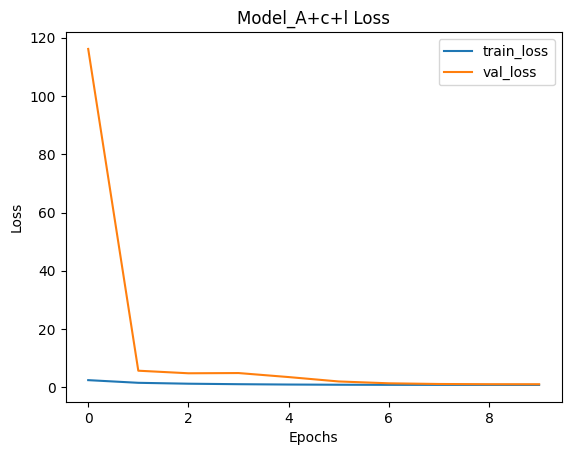

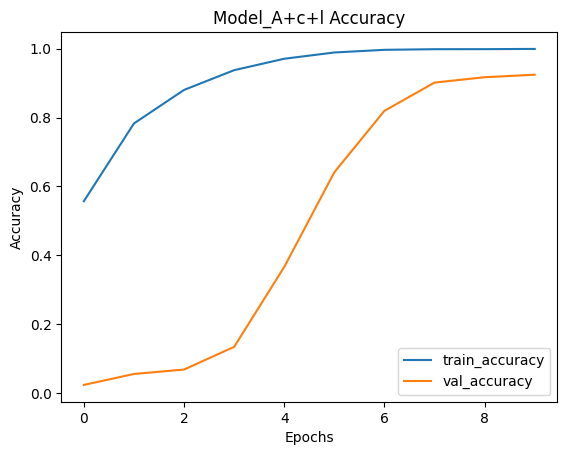

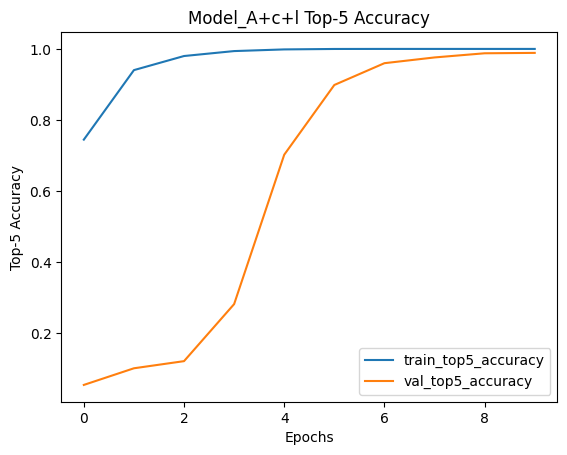

In [2]:
# Visualization Model_A+c+l learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+c+l Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+c+l Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+c+l Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [7]:
# Cosine Decay + Mixup Train (model_A+c+m)

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64
total_epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=total_epochs*train_generator.samples//batch_size)

optimizer = Adam(learning_rate=lr_schedule)

def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lambda_ = np.random.beta(alpha, alpha)
    else:
        lambda_ = 1
    
    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)
    
    mixed_x = lambda_ * x + (1 - lambda_) * x[index]
    mixed_y = lambda_ * y + (1 - lambda_) * y[index]
    
    return mixed_x, mixed_y

def mixup_generator(generator, alpha=0.2):
    while True:
        data = next(generator)
        images, labels = data[0], data[1]
        images, labels = mixup_data(images, labels, alpha)
        yield images, labels

train_mixup_generator = mixup_generator(train_generator)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_mixup_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=total_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 268s 2s/step - loss: 2.5641 - accuracy: 0.4958 - top_k_categorical_accuracy: 0.6780 - val_loss: 89.8333 - val_accuracy: 0.0910 - val_top_k_categorical_accuracy: 0.2048
Epoch 2/10
114/114 [==============================] - 261s 2s/step - loss: 1.5265 - accuracy: 0.7097 - top_k_categorical_accuracy: 0.8938 - val_loss: 5.9724 - val_accuracy: 0.0547 - val_top_k_categorical_accuracy: 0.0999
Epoch 3/10
114/114 [==============================] - 261s 2s/step - loss: 1.2332 - accuracy: 0.7918 - top_k_categorical_accuracy: 0.9335 - val_loss: 5.5406 - val_accuracy: 0.0162 - val_top_k_categorical_accuracy: 0.1150
Epoch 4/10
114/114 [==============================] - 261s 2s/step - loss: 1.0325 - accuracy: 0.8606 - top_k_categorical_accuracy: 0.9607 - val_loss: 5.0247 - val_accuracy: 0.1038 - val_top_k_categorical_accuracy: 0.2539
Epoch 5/10
114/114 [=======

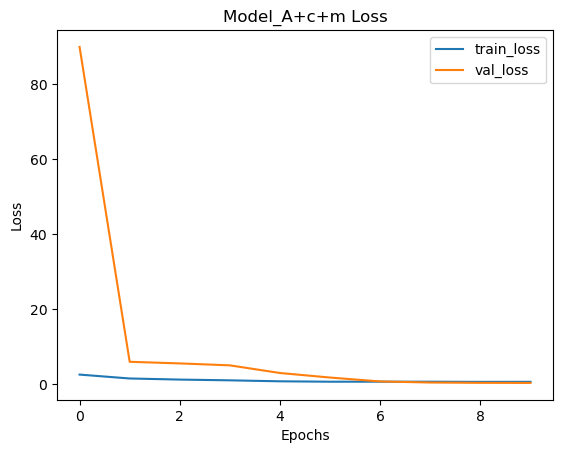

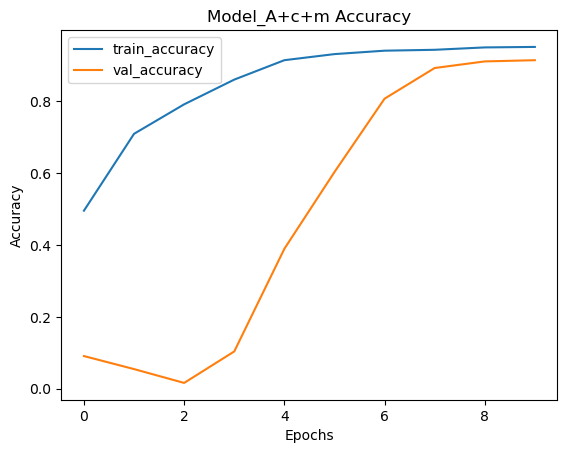

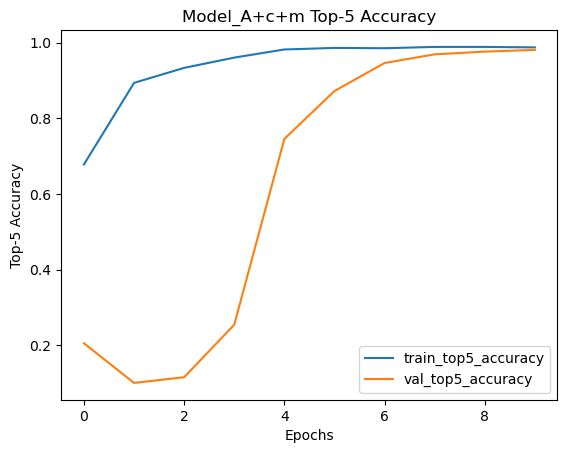

In [8]:
# Visualization Model_A+c+m learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+c+m Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+c+m Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+c+m Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [11]:
# Label Smoothing + Mixup Train (model_A+l+m)

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

loss = CategoricalCrossentropy(label_smoothing=0.1)

def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lambda_ = np.random.beta(alpha, alpha, size=x.shape[0])  # Modify to fit the batch size
    else:
        lambda_ = np.ones(x.shape[0])  # Modify to fit the batch size

    # Expand lambda to fit the image data dimension
    lambda_x = lambda_[:, np.newaxis, np.newaxis, np.newaxis]
    lambda_y = lambda_[:, np.newaxis]

    index = np.random.permutation(x.shape[0])  # Modify to fit the batch size

    # Adjust the lambda to enable broadcasting
    mixed_x = lambda_x * x + (1 - lambda_x) * x[index]
    mixed_y = lambda_y * y + (1 - lambda_y) * y[index]

    return mixed_x, mixed_y

def mixup_generator(generator, alpha=0.2):
    while True:
        data = next(generator)
        images, labels = data[0], data[1]
        images, labels = mixup_data(images, labels, alpha)
        yield images, labels

mixup_train_generator = mixup_generator(train_generator)

model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    mixup_train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 269s 2s/step - loss: 3.2460 - accuracy: 0.4053 - top_k_categorical_accuracy: 0.5735 - val_loss: 5.2900 - val_accuracy: 0.0061 - val_top_k_categorical_accuracy: 0.1540
Epoch 2/10
114/114 [==============================] - 262s 2s/step - loss: 2.4037 - accuracy: 0.6106 - top_k_categorical_accuracy: 0.8162 - val_loss: 4.9889 - val_accuracy: 0.0061 - val_top_k_categorical_accuracy: 0.0820
Epoch 3/10
114/114 [==============================] - 261s 2s/step - loss: 2.1105 - accuracy: 0.7070 - top_k_categorical_accuracy: 0.8828 - val_loss: 5.4391 - val_accuracy: 0.0536 - val_top_k_categorical_accuracy: 0.0887
Epoch 4/10
114/114 [==============================] - 261s 2s/step - loss: 1.9378 - accuracy: 0.7612 - top_k_categorical_accuracy: 0.9202 - val_loss: 4.8617 - val_accuracy: 0.0893 - val_top_k_categorical_accuracy: 0.2081
Epoch 5/10
114/114 [========

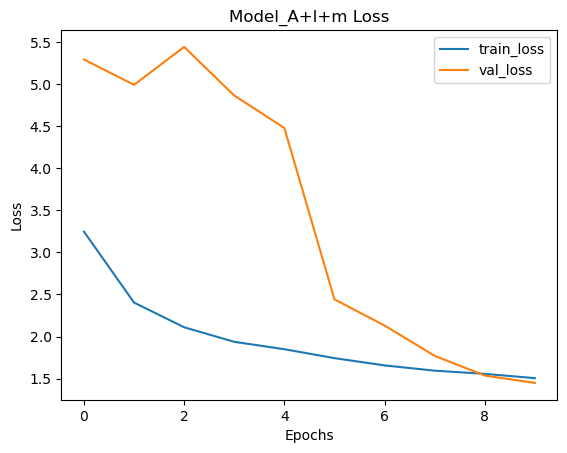

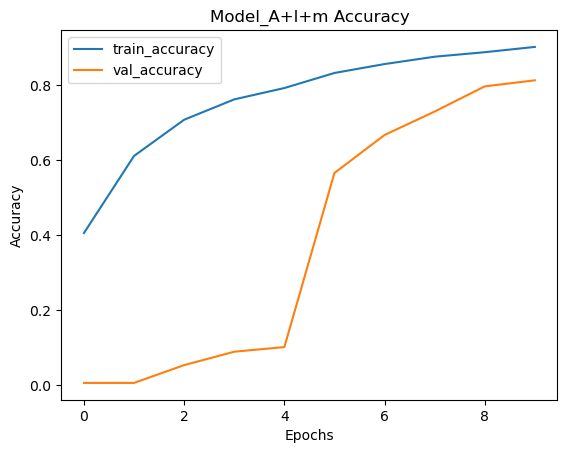

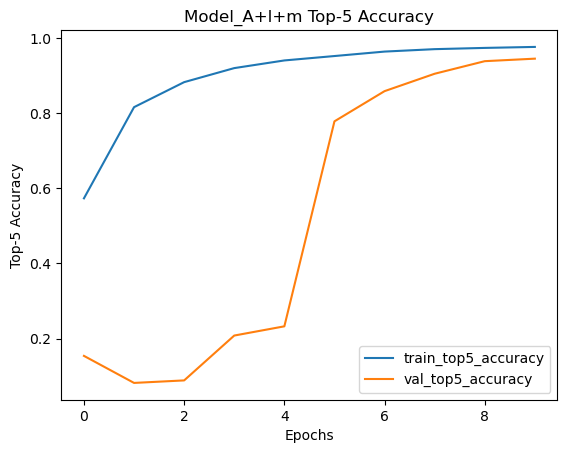

In [12]:
# Visualization Model_A+l+m learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+l+m Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+l+m Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+l+m Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [13]:
# Cosine Decay + Label Smoothing + Mixup Train (model_A+c+l+m)

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

def mixup_data(x, y, alpha=0.2):
    if alpha > 0:
        lambda_ = np.random.beta(alpha, alpha, size=x.shape[0])
    else:
        lambda_ = np.ones(x.shape[0])

    lambda_x = lambda_[:, np.newaxis, np.newaxis, np.newaxis]
    lambda_y = lambda_[:, np.newaxis]

    index = np.random.permutation(x.shape[0])

    mixed_x = lambda_x * x + (1 - lambda_x) * x[index]
    mixed_y = lambda_y * y + (1 - lambda_y) * y[index]

    return mixed_x, mixed_y

def mixup_generator(generator, alpha=0.2):
    while True:
        data = next(generator)
        images, labels = data[0], data[1]
        images, labels = mixup_data(images, labels, alpha)
        yield images, labels


base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

loss = CategoricalCrossentropy(label_smoothing=0.1)

lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=total_epochs*train_generator.samples//batch_size)

optimizer = Adam(learning_rate=lr_schedule)

mixup_train_generator = mixup_generator(train_generator)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    mixup_train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 268s 2s/step - loss: 3.2853 - accuracy: 0.3999 - top_k_categorical_accuracy: 0.5636 - val_loss: 4.8855 - val_accuracy: 0.0078 - val_top_k_categorical_accuracy: 0.0340
Epoch 2/10
114/114 [==============================] - 262s 2s/step - loss: 2.4337 - accuracy: 0.5924 - top_k_categorical_accuracy: 0.8018 - val_loss: 5.3465 - val_accuracy: 0.0552 - val_top_k_categorical_accuracy: 0.1038
Epoch 3/10
114/114 [==============================] - 262s 2s/step - loss: 2.0886 - accuracy: 0.6997 - top_k_categorical_accuracy: 0.8884 - val_loss: 5.6825 - val_accuracy: 0.0525 - val_top_k_categorical_accuracy: 0.0787
Epoch 4/10
114/114 [==============================] - 262s 2s/step - loss: 1.8185 - accuracy: 0.7959 - top_k_categorical_accuracy: 0.9424 - val_loss: 5.2777 - val_accuracy: 0.0826 - val_top_k_categorical_accuracy: 0.1719
Epoch 5/10
114/114 [========

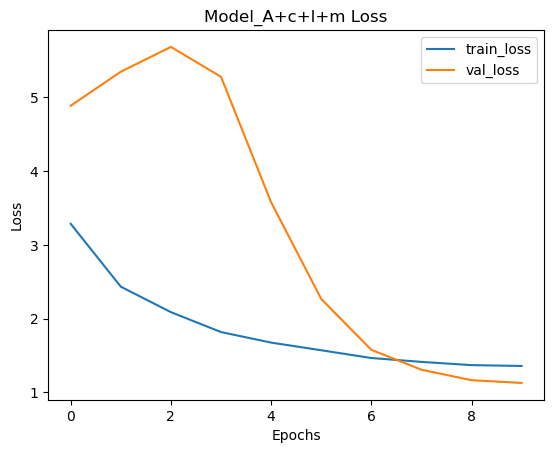

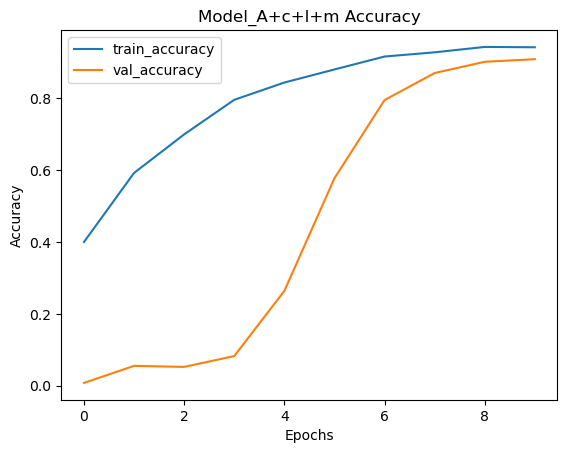

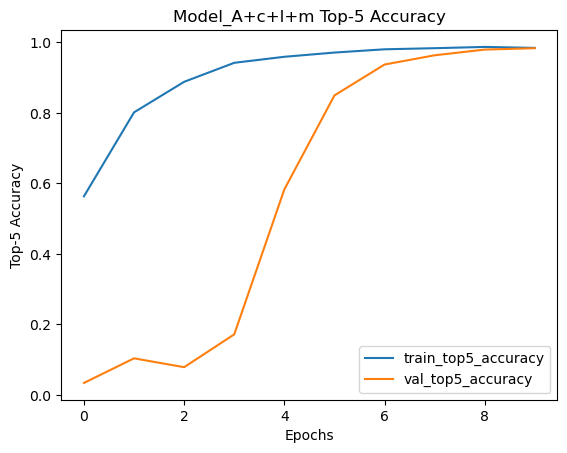

In [14]:
# Visualization Model_A+c+l+m learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_A+c+l+m Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_A+c+l+m Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_A+c+l+m Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()